# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético). Todas las variables son numércias.

### 1. Carga las librerias que consideres comunes al notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [5]:
columns_name = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
url = ("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv")

df = pd.read_csv(url, sep=(","), names=columns_name)
df


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df["class"].value_counts()

class
0    500
1    268
Name: count, dtype: int64

<Axes: >

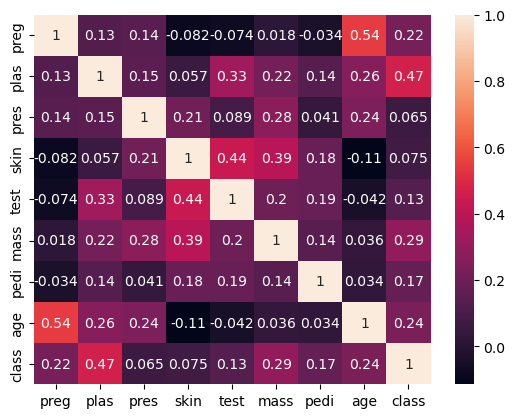

In [8]:
sns.heatmap(df.corr(), annot=True)

### 3. Bagging

Bagging (Bootstrap Aggregating) es una técnica de ensamblado que se utiliza para mejorar la precisión y reducir la varianza de los modelos de aprendizaje automático, como los árboles de decisión.

En el contexto de un árbol de decisión, el bagging tiene los siguientes beneficios y funciones:

1. Reducir la varianza del modelo
Los árboles de decisión son muy propensos a sobreajustarse (overfitting) a los datos de entrenamiento, especialmente cuando los árboles son profundos. El bagging ayuda a reducir este sobreajuste al crear varios modelos (árboles de decisión) a partir de diferentes subconjuntos aleatorios de los datos y luego combinar sus predicciones.

2. Mejorar la generalización
Bagging mejora la capacidad de generalización de los modelos al entrenar múltiples árboles de decisión sobre muestras diferentes del conjunto de datos original (con reemplazo). Esto hace que el modelo final sea más robusto y menos sensible a las fluctuaciones o ruidos en los datos.

3. Proceso de Bagging:
Muestreo con reemplazo: Se crean varios subconjuntos de los datos mediante un proceso llamado bootstrap, en el cual se seleccionan muestras aleatorias con reemplazo del conjunto de datos original. Cada subconjunto tendrá la misma cantidad de datos que el conjunto original, pero con algunas instancias repetidas y otras no seleccionadas.
Entrenamiento de árboles: Se entrena un árbol de decisión en cada uno de estos subconjuntos.
Promediado de predicciones: En el caso de problemas de regresión, las predicciones de cada árbol se promedian. En el caso de clasificación, se hace una votación entre los árboles y se selecciona la clase que más veces fue predicha.


Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [10]:
# Separa los datos en features (X) y target (y)
# Nuestro target es df["class"]
# Muestra el shape de ambos conjuntos
X = df.values[:, :8]
y = df["class"]

print(X.shape)
print(y.shape)

(768, 8)
(768,)


En machine learning, la semilla (también conocida como seed) es un valor numérico que se utiliza para inicializar el generador de números aleatorios. Es un concepto clave cuando se trabaja con algoritmos que dependen de la aleatoriedad, como aquellos que involucran partición de datos, inicialización de pesos o selección aleatoria de muestras.

**¿Por qué es importante la semilla?**
La semilla asegura que el proceso de generación de números aleatorios sea reproducible. En otras palabras, cuando usas la misma semilla, los mismos resultados aleatorios serán generados cada vez que ejecutes el código. Esto es fundamental para la reproducibilidad de experimentos, una característica esencial en la ciencia de datos y machine learning, ya que permite que otros investigadores o desarrolladores puedan obtener los mismos resultados cuando utilicen el mismo código y los mismos datos.

**¿Cómo funciona la semilla?**
Cuando se utiliza una semilla, el generador de números aleatorios comienza en una posición determinada en la secuencia de números pseudoaleatorios. Esto hace que las secuencias generadas sean deterministas, es decir, que siempre se generen los mismos números aleatorios a partir de la misma semilla.

Ejemplo:
Supón que tienes un algoritmo de machine learning que involucra dividir tus datos en conjuntos de entrenamiento y prueba de forma aleatoria. Si no estableces una semilla, la división de los datos cambiará cada vez que ejecutes el código, lo que hace que los resultados varíen. Sin embargo, si fijas la misma semilla, la división será la misma cada vez, y podrás obtener los mismos resultados de manera consistente.




In [16]:
# Vamos a grabar la semilla 7 para todos los modelos en la variable seed
seed = 7

In [21]:
# Instancia un Decision Tree Classifier

# Instancia un Bagging Classifier cuyo base estimator sea el DecisionTreeClassifier() , el número de estimadores sea 100 y el random state sea la semilla seed que hemos creado

# Instancia 10 KFolds en la variable kfold

# Cálcula el cross validation score del Bagging Classifier con X e y, el cv sea igual a kfold y el scoring sea 'accuracy'

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

dtc = DecisionTreeClassifier(max_depth=3, random_state=seed, class_weight="balanced")
model= BaggingClassifier(estimator=dtc, n_estimators=100, random_state=seed, n_jobs=-1)

kfold = KFold(10)
results_cv = cross_val_score(model, X, y, cv=kfold, scoring="accuracy", n_jobs=-1) 

In [19]:
# Obtén la media del cross validation score para el Bagging Classifier
# Simplemente en la variable en la que guardaste el CV usa el método < .mean() >
results_cv.mean()

0.7590909090909091

### 4. Random Forest
- Definición: Ensamble de muchos árboles de decisión entrenados en subconjuntos aleatorios de los datos y características. La predicción es por votación mayoritaria.
- Uso: Clasificación robusta con datos con ruido, como diagnóstico médico.
- Problema: Clasificación.
- **¿Qué hiperparámetros debería tocar en el RandomForest?**
    1. `n_estimators`: número de árboles que participarán en las votaciones. Cuantos más mejor. NO producen overfitting. Cuanto más complejo es el dataset, mejor vendrá que haya muchos árboles. Más de 200 suele ser redundante.
    2. `max_depth`: profundida de los árboles. Cuanto más profundos, más complejo es el modelo, pero menos generaliza. De  nuevo, cuanto más complejo es el problema, mayor profundidad necesitaremos. No más de 20/30 es lo normal.
    3. `max_features`: features a tener en cuenta en los splits del árbol. Cuanto más bajo, mejor generalizará y menos overfitting. Numero menor a la cantidad de features del dataset, sino dará error.
    4. `min_samples_split`: mínima cantidad de muestras en un nodo antes de ser spliteado. 2 por defecto. Números bajos suelen dar buenos resultados (<50). Cuanto más alto, mejor generaliza, pero más baja la precisión.
    5. `min_samples_leaf`: mínima cantidad de puntos permitidos en un `leaf node`, es decir, un nodo que no va a volver a ser spliteado. Valores bajos funcionan bien (<50).
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [22]:
# Instancia un Random Forest Classifier con 100 árboles, max features de 3 y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del Random Forest Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=100, max_depth=3, random_state=seed)

results_cv_rfc = cross_val_score(model, X, y, cv=kfold)

In [23]:
# Obtén la media del cross validation score para el Random Forest Classifier
results_cv_rfc.mean()

0.7616883116883117

### 5. AdaBoost
- Definición: Ensamble de boosting que da más peso a las instancias mal clasificadas en iteraciones sucesivas, ajustando modelos base (como árboles).
- Uso: Clasificación en datos desequilibrados o complejos.
- Problema: Clasificación.
- **¿Qué hiperparámetros debería tocar en el AdaBoostClassifier?**
    1. `n_estimators`: número de árboles que participarán en la corrección secuencial del error del modelo. Si corregimos el error a la perfección el algoritmo termina de entrenar. Cuantos más estimadores, mejor corregiremos el error pero mayor probabilidad de caer en overfitting. Valores superiores a 100 suelen sobreajustar el modelo aunque dependerá de la complejidad y volumen de los datos.
    2. `learning_rate`: no suele tener valores superiores a 1. Cuanto más alto, más aporta cada nuevo árbol, más preciso, pero caemos en overfitting. **Importante**: un learning rate bajo y alto número de estimadores no necesariamente tiene por qué aumentar la precisión y si va a inducir en altos costes computacionales.
    3. `algorithm`: 'SAME' o 'SAME.R'. 'SAME.R' utiliza la probabilidad para actualizar los modelos aditivos, mientras que 'SAME' usa los valores de clasificación. Similar a soft vs hard voting. 'SAMME.R' converge antes que 'SAMME'
    4. `base_estimator`: se suele dejar por defecto, aunque podría encajar un SVM o una RegresiónLogística
    5. `max_depth`: **OJO**, no es un hiperparámetro del AdaBoostClassifier, sino del DecisionTreeClassifier. Habrá que probar varios árboles con diferentes `max_depth` y después ponerlos como `base_estimator` en el AdaBoost. Cuanto mayor es este hiperparámetro, más preciso, pero también más overfitting.

Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [27]:
from sklearn.ensemble import AdaBoostClassifier

model= AdaBoostClassifier(n_estimators=300, random_state=seed, learning_rate=0.01)

results_cv_ab= cross_val_score(model, X, y, cv=kfold, n_jobs=-1)

/opt/miniconda3/envs/data_env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/miniconda3/envs/data_env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/miniconda3/envs/data_env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/miniconda3/envs/data_env/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

In [29]:
results_cv_ab.mean()

0.7617053998632947

### 6. GradientBoosting
- El GradientBoosting funciona sólo con árboles, por eso no es posible cambiar el estimador. 
- Directamente los hiperparámetros a configurar en en GradientBoosting son los del DecissionTree.
- **¿Qué hiperparámetros debería tocar en el GradientBoosting?**
    1. `n_estimators`: número de árboles que participarán en la corrección secuencial del error del modelo. Si corregimos el error a la perfección el algoritmo termina de entrenar. Cuantos más estimadores, mejor corregiremos el error pero mayor probabilidad de caer en overfitting. Valores superiores a 100 suelen sobreajustar el modelo aunque dependerá de la complejidad y volumen de los datos.
    2. `learning_rate`: no suele tener valores superiores a 1. Cuanto más alto, más aporta cada nuevo árbol, más preciso, pero caemos en overfitting. **Importante**: un learning rate bajo y alto número de estimadores no necesariamente tiene por qué aumentar la precisión y si va a inducir en altos costes computacionales.
    3. `max_depth`: Cuanto mayor es este hyperparámetro, más preciso, pero también más overfitting.
    - Se puede iterar sobre todos los hiperparámetros recorridos en el RandomForest

Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

model= GradientBoostingClassifier(n_estimators=100, random_state=seed, learning_rate=0.01)

results_cv_gb= cross_val_score(model, X, y, cv=kfold, n_jobs=-1)

In [32]:
results_cv_gb.mean()

0.7512474367737526

### 7. XGBoost
- **¿Qué hiperparámetros debería tocar en el XGB?**
    1. `n_estimators`: igual que para el GradientBoosting.
    2. `booster`: tipo de modelo que correrá en cada iteración. Arboles o regresiones. `gbtree` or `gblinear`. Los árboles suelen ir bien.
    3. `learning_rate`: o también llamado `eta`. Como el learning rate del GradientBoosting.
    4. `max_depth`: nada nuevo
    - Si quieres afinar más todavía el XGBoost consulta [esta completa guía](https://www.analyticsvidhya.com/blog/2016/03 complete-guide-parameter-tuning-xgboost-with-codes-python/).

Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [ ]:
# Descomenta la siguiente wea (palabra chilena, no es ningun termino de Machine Learning) para instalar el XGBoost

In [34]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xgboost: filename=xgboost-2.1.2-py3-none-macosx_11_0_arm64.whl size=1815046 sha256=67f0b43fe00caa50edeccf8041a3d5e34d6146ececc5fde17e3fccccdf117d63
  Stored in directory: /Users/paulajimenezsuaza/Library/Caches/pip/wheels/9d/fa/b3/6176653fcef69c028e348ec28c40ababbbb23907d8e21cf176
Successfully built xgboost


In [35]:
from xgboost import XGBClassifier

In [36]:
# Instancia un XGBoost Classifier con 100 estimadores y que el random state sea la seed que hemos creado

# Cálcula el cross validation score del XGBoost Classifier con X e y, y que el cv sea igual a kfold

# Recuerda que el cross validation score se graba en una nueva variable, dale un nombre adecuado y no la borres, la necesitarás al final del ejercicio

model= XGBClassifier(n_estimators=100, random_state=seed, learning_rate=0.01)

results_cv_xhbc= cross_val_score(model, X, y, cv=kfold, n_jobs=-1)

In [37]:
results_cv_xhbc.mean()

0.757740943267259

### 8. Resultados
Crea un series con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [40]:
result = [results_cv.mean(), results_cv_rfc.mean(), results_cv_ab.mean(), results_cv_gb.mean(), results_cv_xhbc.mean()]
models = ['Bagging DT', "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados = pd.Series(result, models).sort_values(ascending=False)
resultados

Random Forest       0.761705
Ada Boost           0.761705
XGBoost             0.757741
Bagging DT          0.756442
GradientBoosting    0.751247
dtype: float64

El modelo con mejor resultado es Random Forest, por lo tanto escogeremos este para nuestro estudio.

In [ ]:
# Si quieres seguir diviertiendote puedes hacer lo siguiente:

# Continue with:
# split train test
# .fit
# evaluation with test